In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#multiclass classification
train=pd.read_csv("glass.csv")

In [3]:
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#Hypothesis testing - Silica and sand,Na, and Ca should be most important variable, refractive index of similar type should be near
#what really the value of columns Na, Mg , Al and Si, K, Ca, Ba , Fe
#My intuition says that for every type of glass refractive index will be quite similar so it can be converted into categorical variable
#The numerical values of various elements is not on same scale which can be a problem in some algorithm

In [5]:
train.shape

(214, 10)

In [6]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
train.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [8]:
pd.crosstab(index=train['Type'],columns="count")
#classes 2 and 1 are dominating


col_0,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29


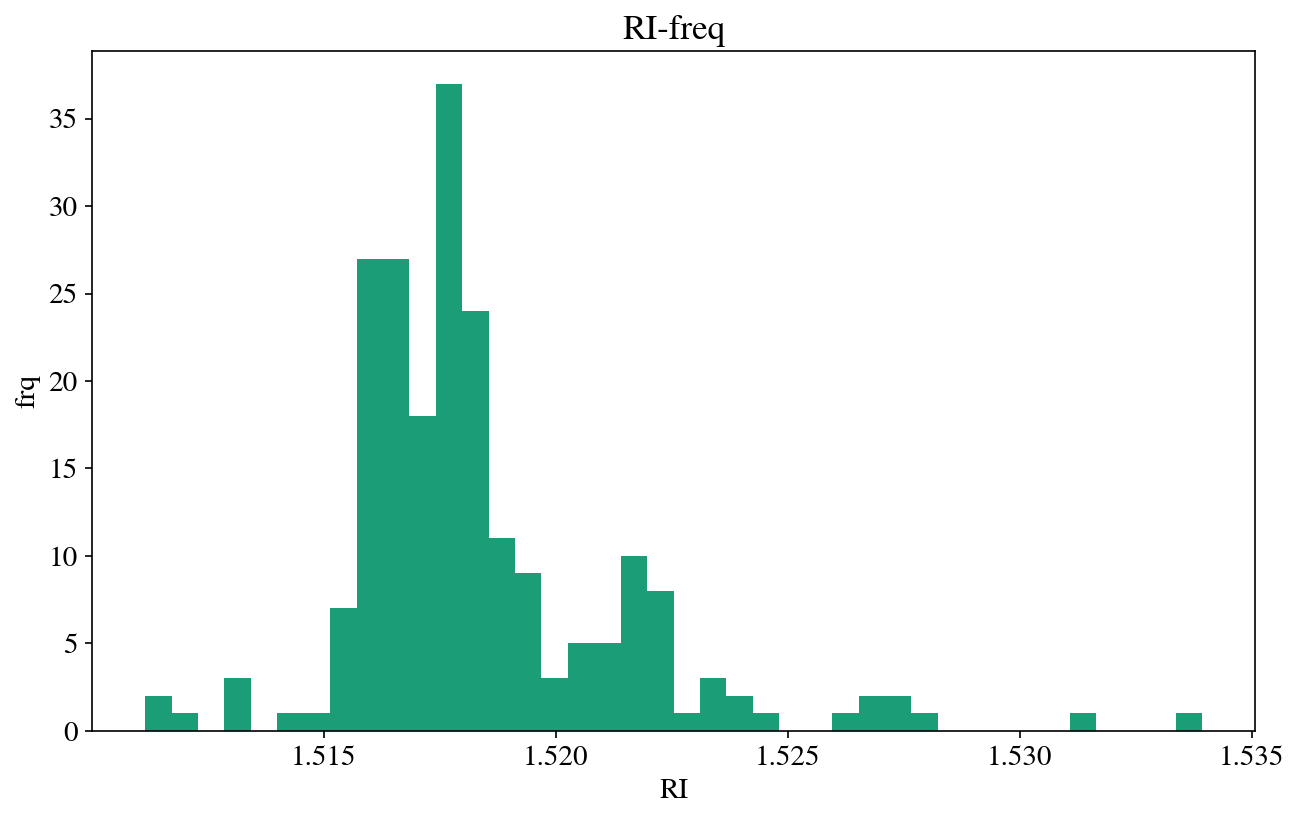

In [9]:
plt.clf()
plt.hist(train['RI'],bins=40)
plt.title("RI-freq")
plt.xlabel("RI")
plt.ylabel("frq")
fig1=plt.gcf()
plt.show()

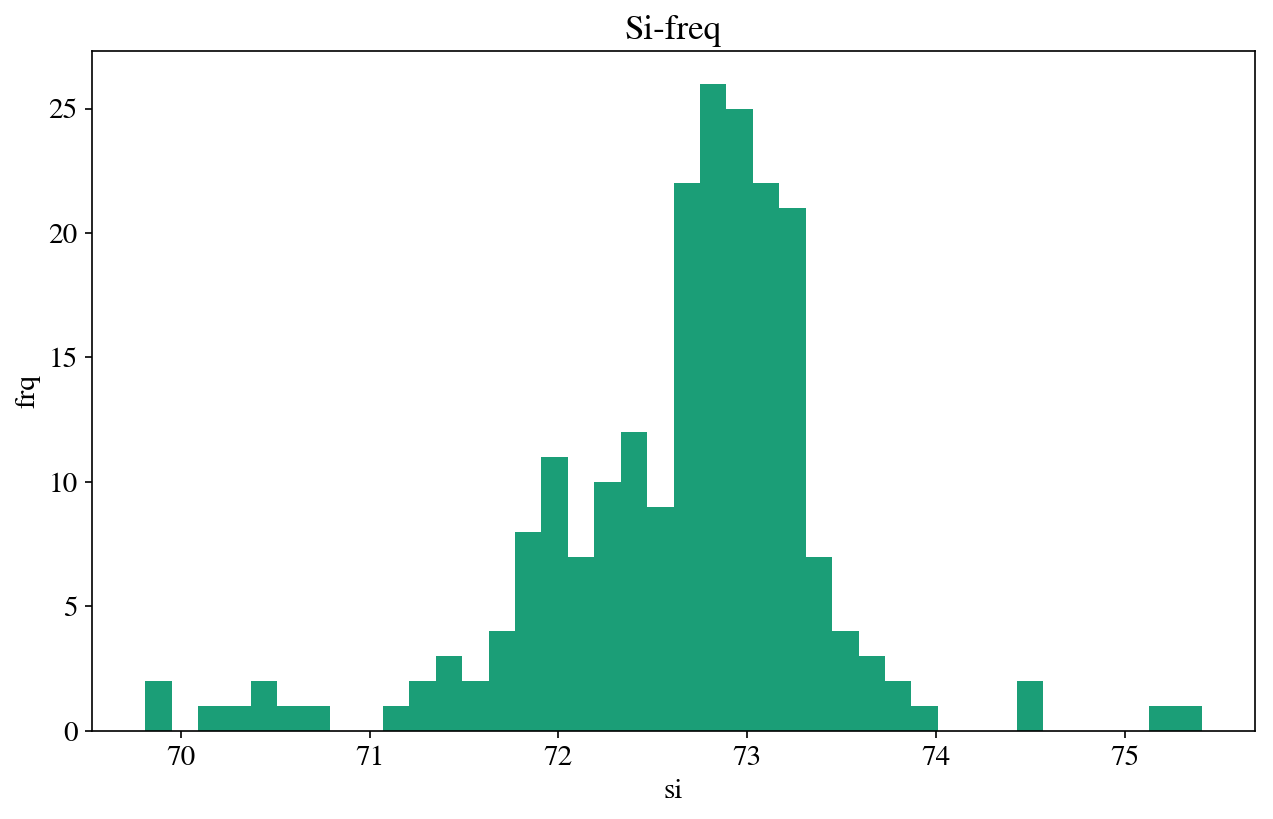

In [10]:
plt.clf()
plt.hist(train['Si'],bins=40)
plt.title("Si-freq")
plt.xlabel("si")
plt.ylabel("frq")
plt.show()

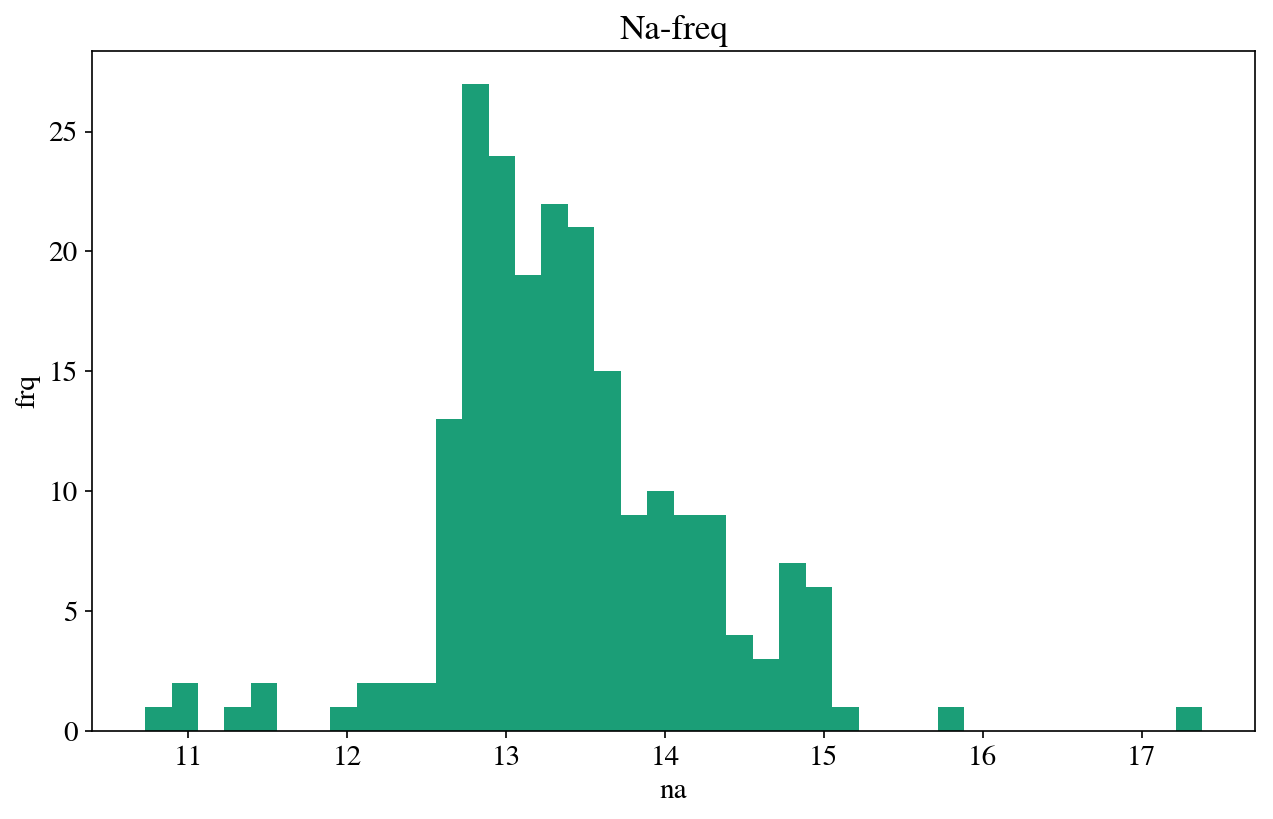

In [11]:
plt.clf()
plt.hist(train['Na'],bins=40)
plt.title("Na-freq")
plt.xlabel("na")
plt.ylabel("frq")
plt.show()

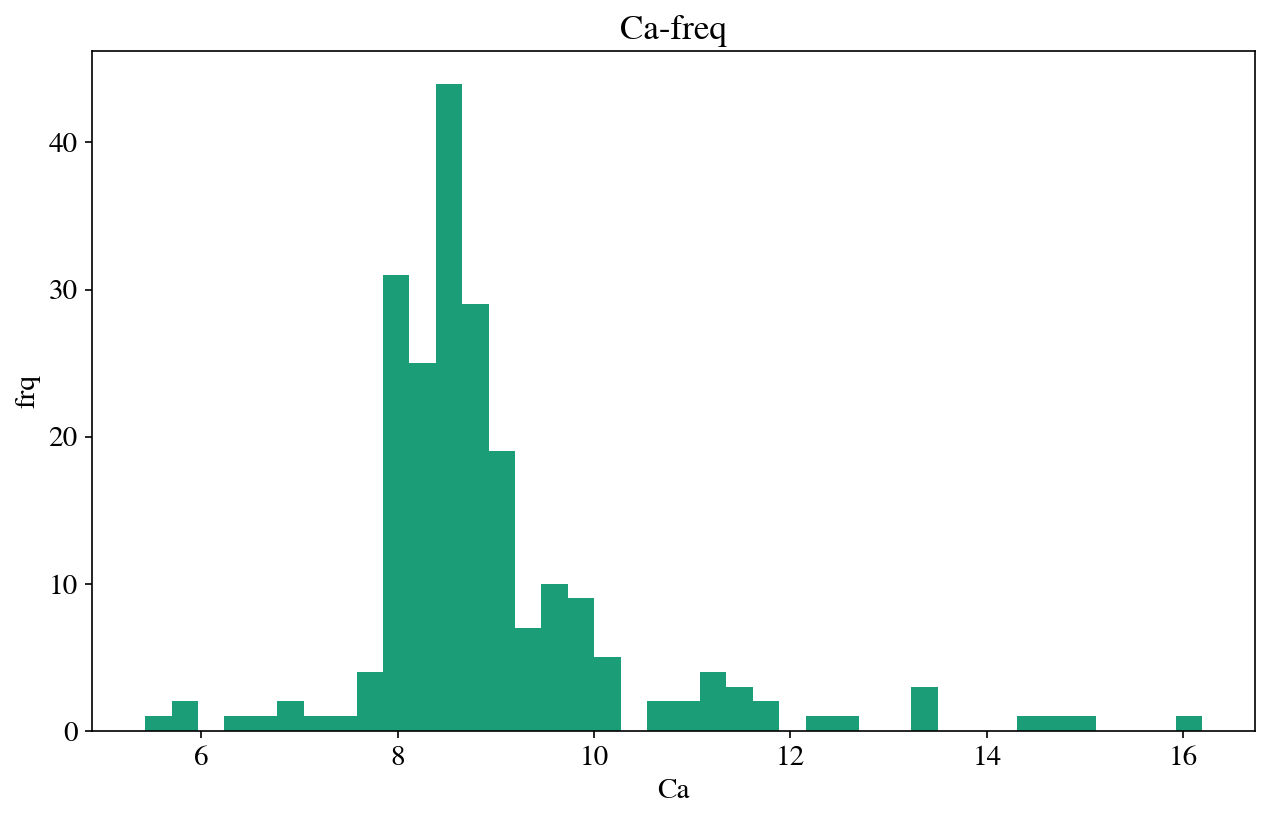

In [12]:
plt.clf()
plt.hist(train['Ca'],bins=40)
plt.title("Ca-freq")
plt.xlabel("Ca")
plt.ylabel("frq")
plt.show()

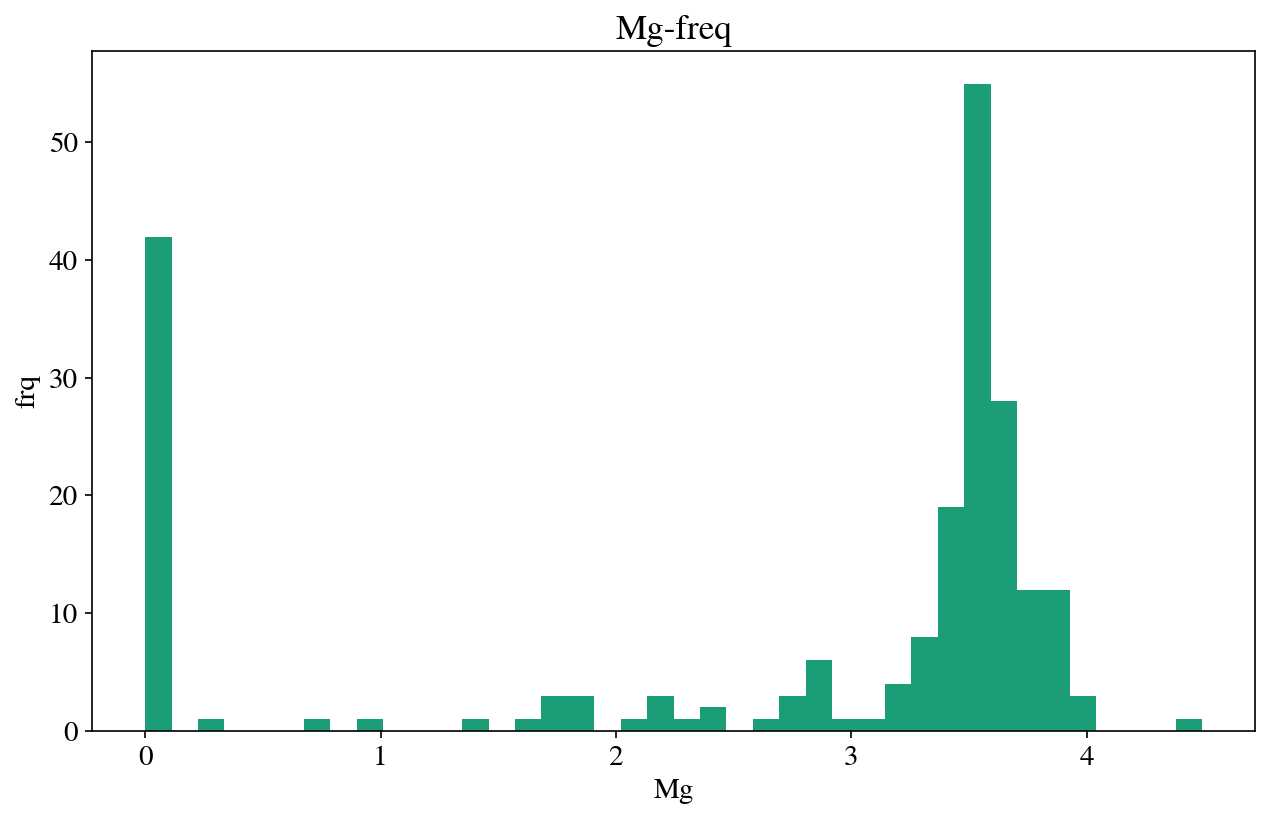

In [13]:
plt.clf()
plt.hist(train['Mg'],bins=40)
plt.title("Mg-freq")
plt.xlabel("Mg")
plt.ylabel("frq")
plt.show()

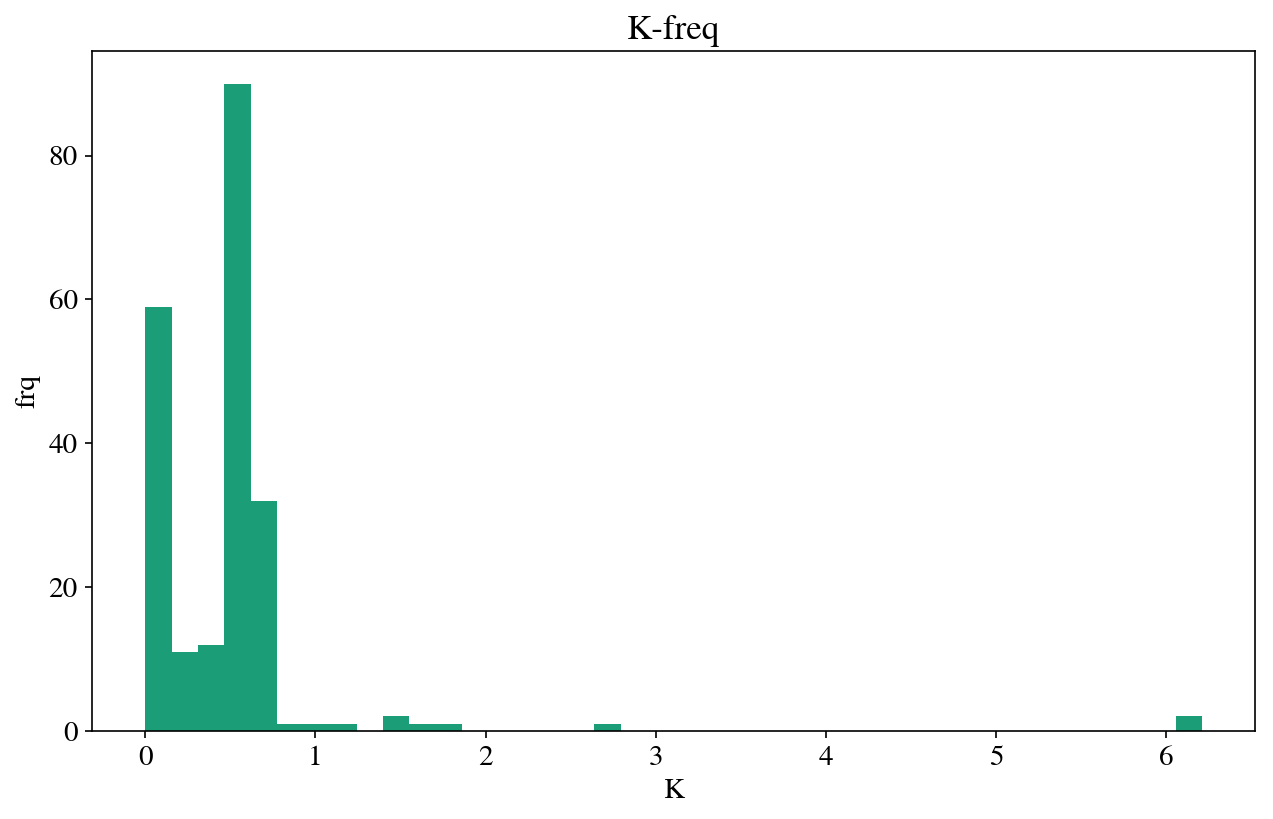

In [14]:
plt.clf()
plt.hist(train['K'],bins=40)
plt.title("K-freq")
plt.xlabel("K")
plt.ylabel("frq")
plt.show()

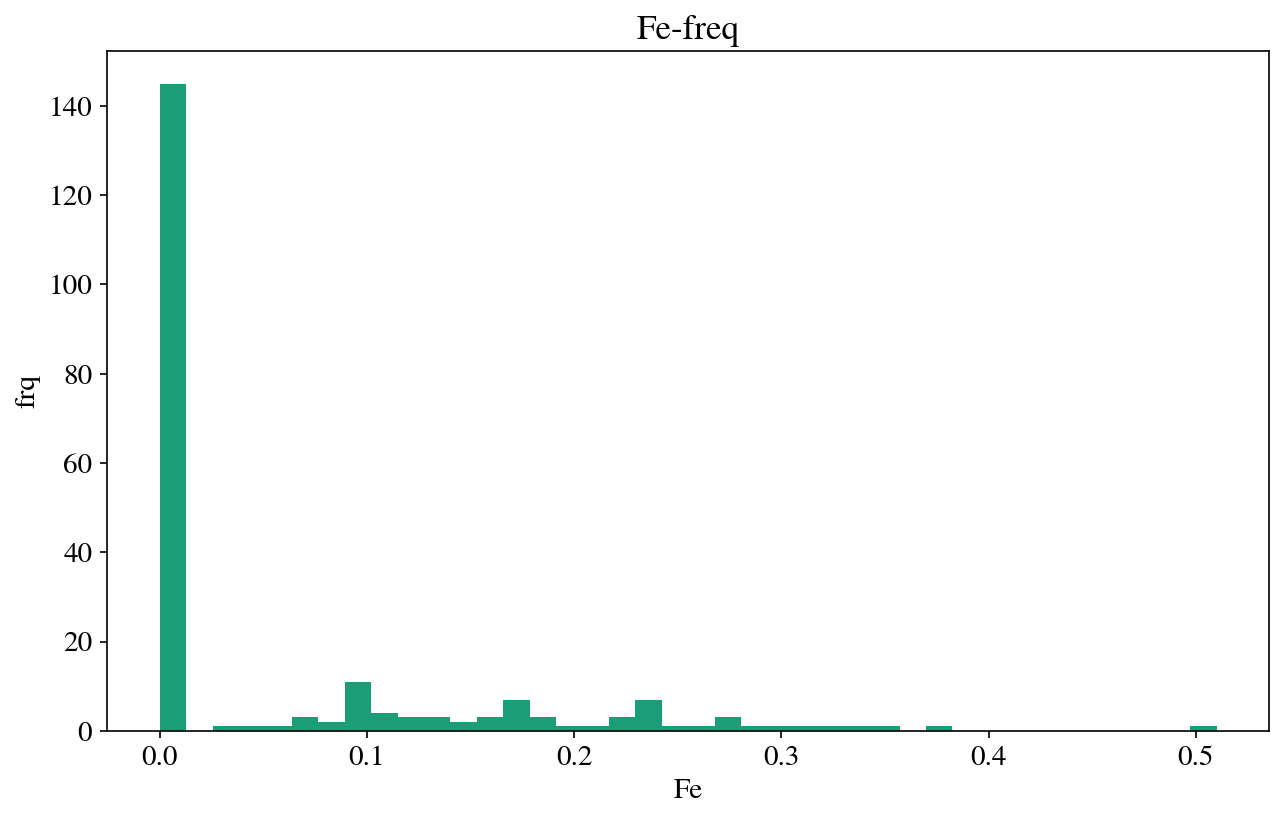

In [15]:
plt.clf()
plt.hist(train['Fe'],bins=40)
plt.title("Fe-freq")
plt.xlabel("Fe")
plt.ylabel("frq")
plt.show()

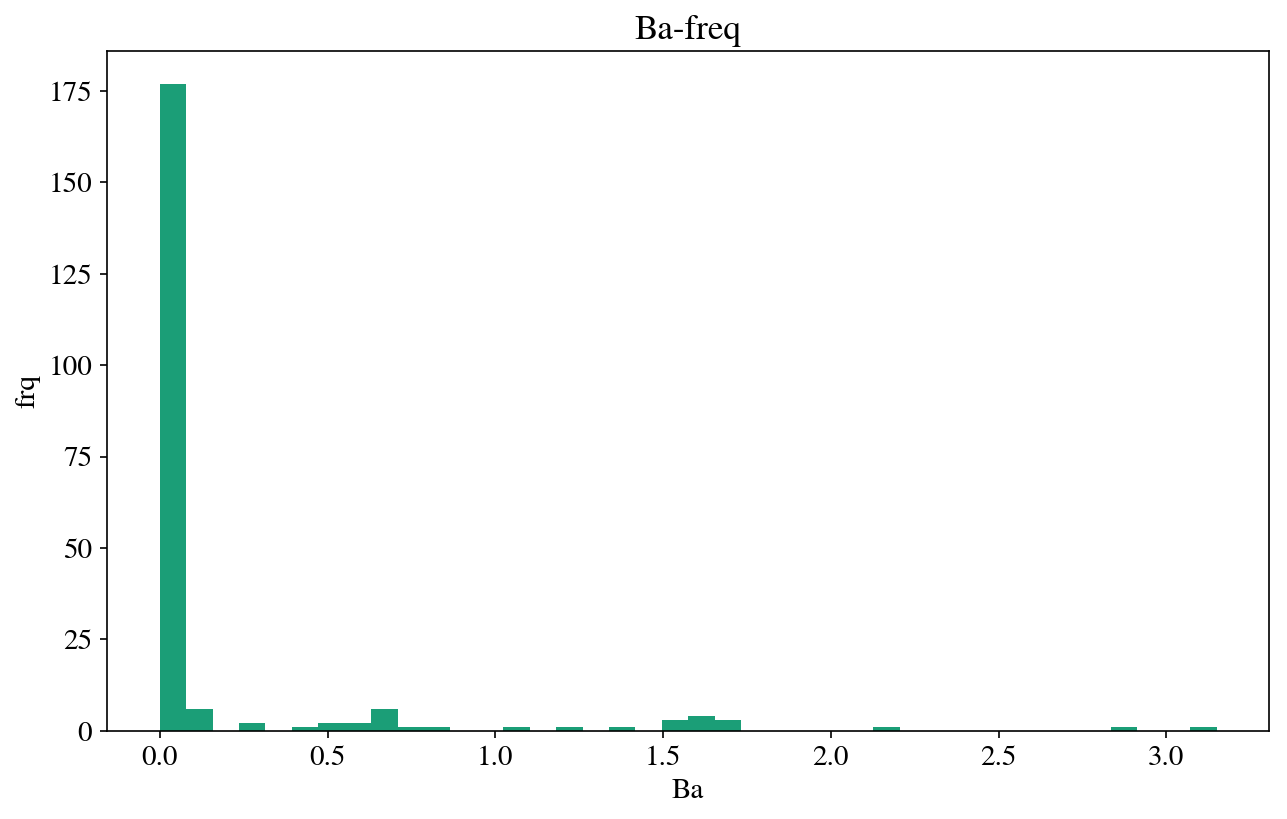

In [16]:
plt.clf()
plt.hist(train['Ba'],bins=40)
plt.title("Ba-freq")
plt.xlabel("Ba")
plt.ylabel("frq")
plt.show()

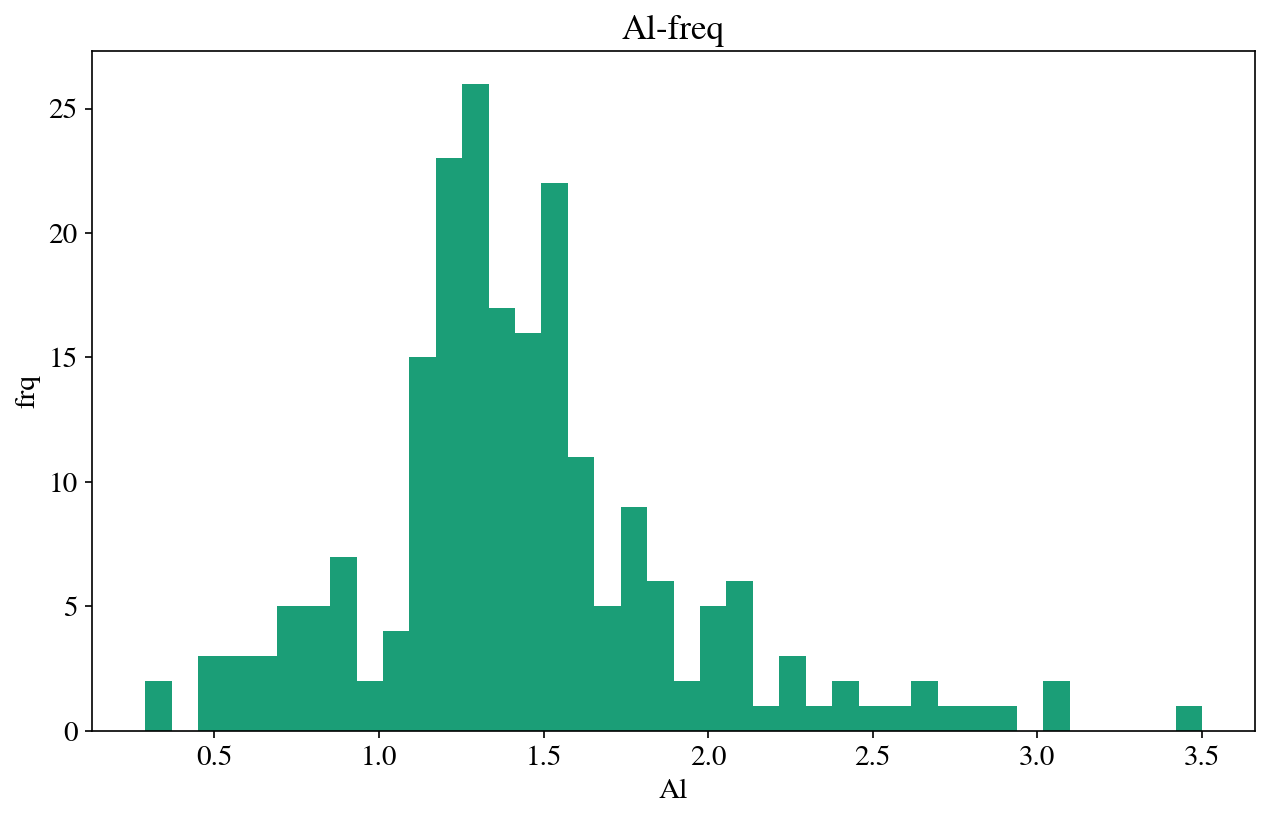

In [17]:
plt.clf()
plt.hist(train['Al'],bins=40)
plt.title("Al-freq")
plt.xlabel("Al")
plt.ylabel("frq")
plt.show()

In [18]:
#The data is skewed and Fe, Ba , Ca and K are most skewed
feat=train.columns[:-1].tolist()

In [19]:
corr=train[feat].corr()
corr
#lot of correlation values heatmap can be made to get the better visualisation
#lot of correlation is there and different ways to tackle correlation can be used
#RI is highly correlated with Si, Ca.
#Mg is correlated with Al and Ba


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


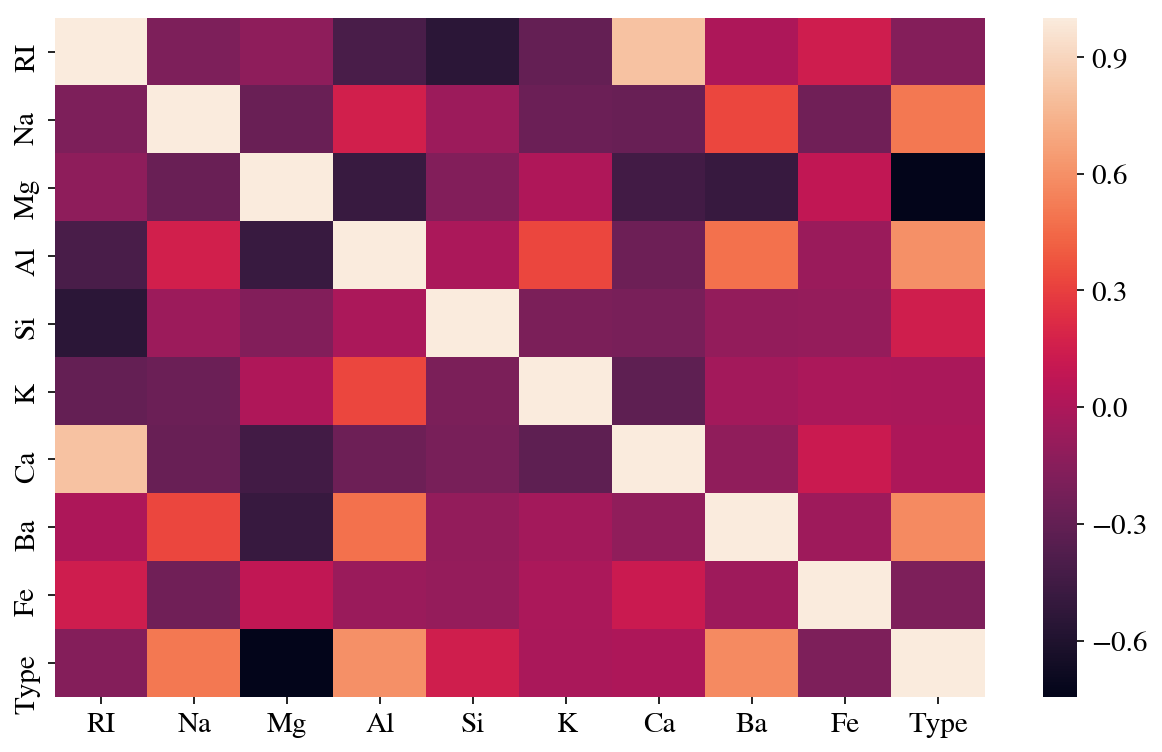

In [20]:
sns.heatmap(train.corr())

In [21]:
train[feat].skew()
#Most skewed dataset is fe,Ba,Ca,K,Mg,RI

RI    1.625431
Na    0.454181
Mg   -1.152559
Al    0.907290
Si   -0.730447
K     6.551648
Ca    2.047054
Ba    3.416425
Fe    1.754327
dtype: float64

In [22]:
# data normalization is important because in SVM distance to classify to normalisation can be considered
#Normalisation and transformation will be useful for reducing skewness in data also
#looking at distribution of each feature w.r.t each type of class can help to get some intution
#to remove correlation we can apply PCA or we can remove one of the feature (preferable PCA so not to lose information)
#feature importance can be calculated with the help of recursive feature elimination

#transformation - http://fmwww.bc.edu/repec/bocode/t/transint.html



In [23]:
# lets go after outliers which can be identified with Tukey's HSD
def outlier(data):
        outlier_index=[]
        for i in data.columns.tolist():
            Q1=np.percentile(data[i],25)
            Q3=np.percentile(data[i],75)
            IQR=Q3-Q1
            outlier_step=1.5*IQR
            outlier_list=data[(data[i]<(Q1-outlier_step))|(data[i]>(Q3+outlier_step))].index
            outlier_index.extend(outlier_list)
            return (outlier_index)
ot=outlier(train[feat])
train.drop(ot,inplace=True)

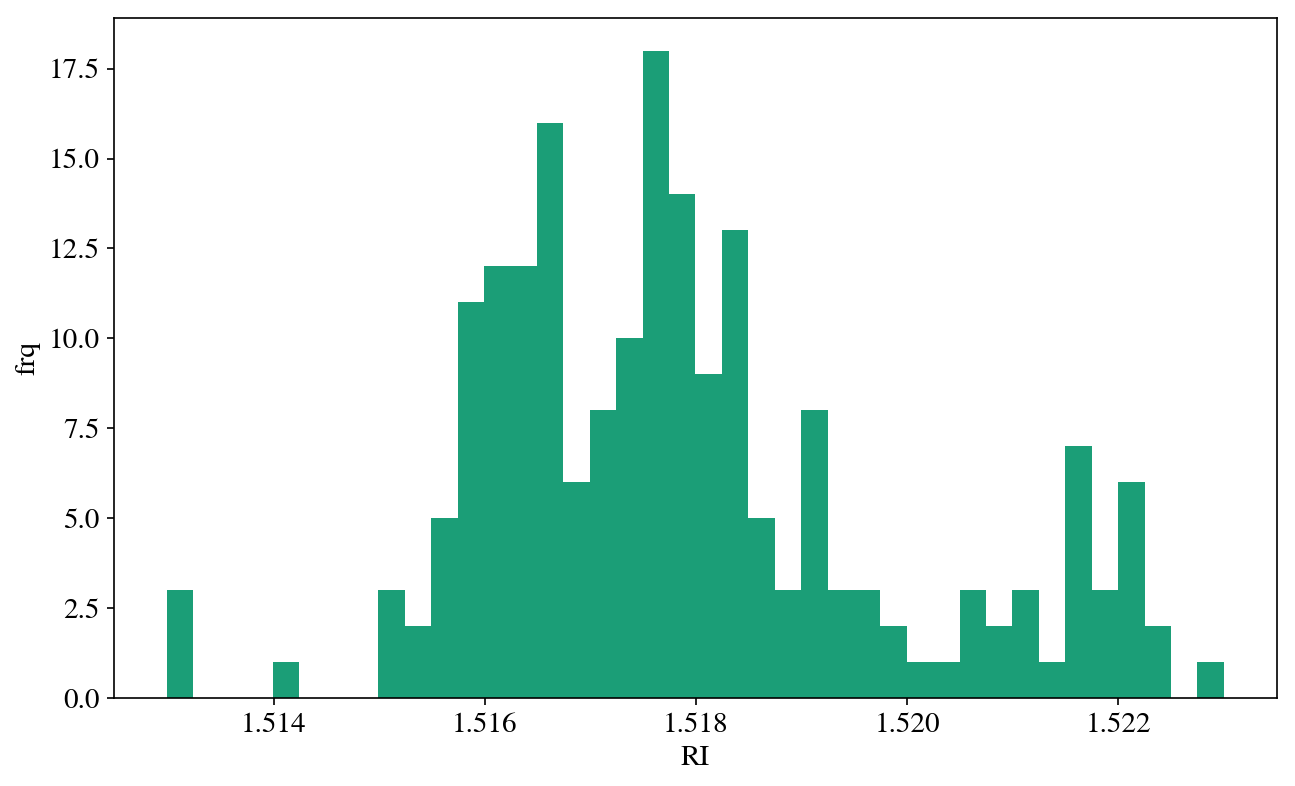

In [24]:
plt.clf()
plt.hist(train['RI'],bins=40)
plt.xlabel('RI')
plt.ylabel("frq")
plt.show()

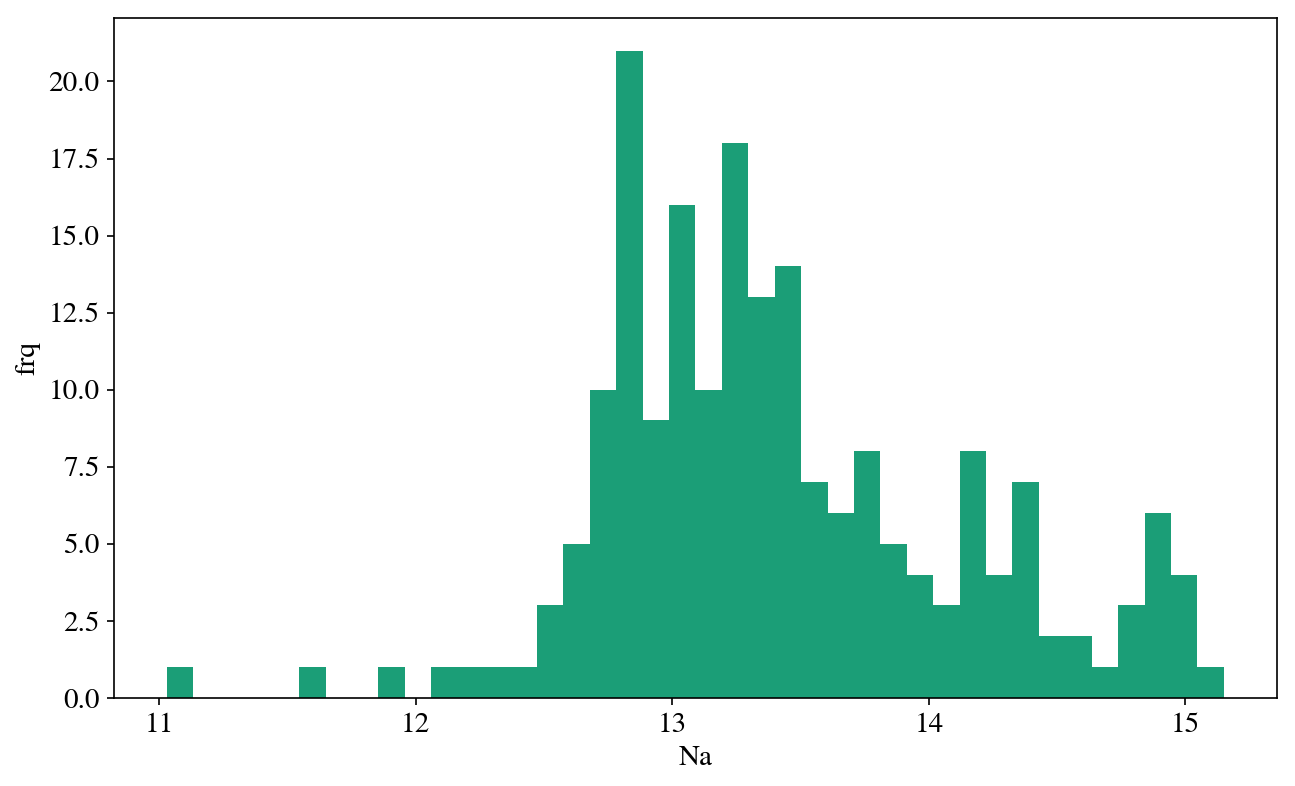

In [25]:
plt.clf()
plt.hist(train['Na'],bins=40)
plt.xlabel('Na')
plt.ylabel("frq")
plt.show()

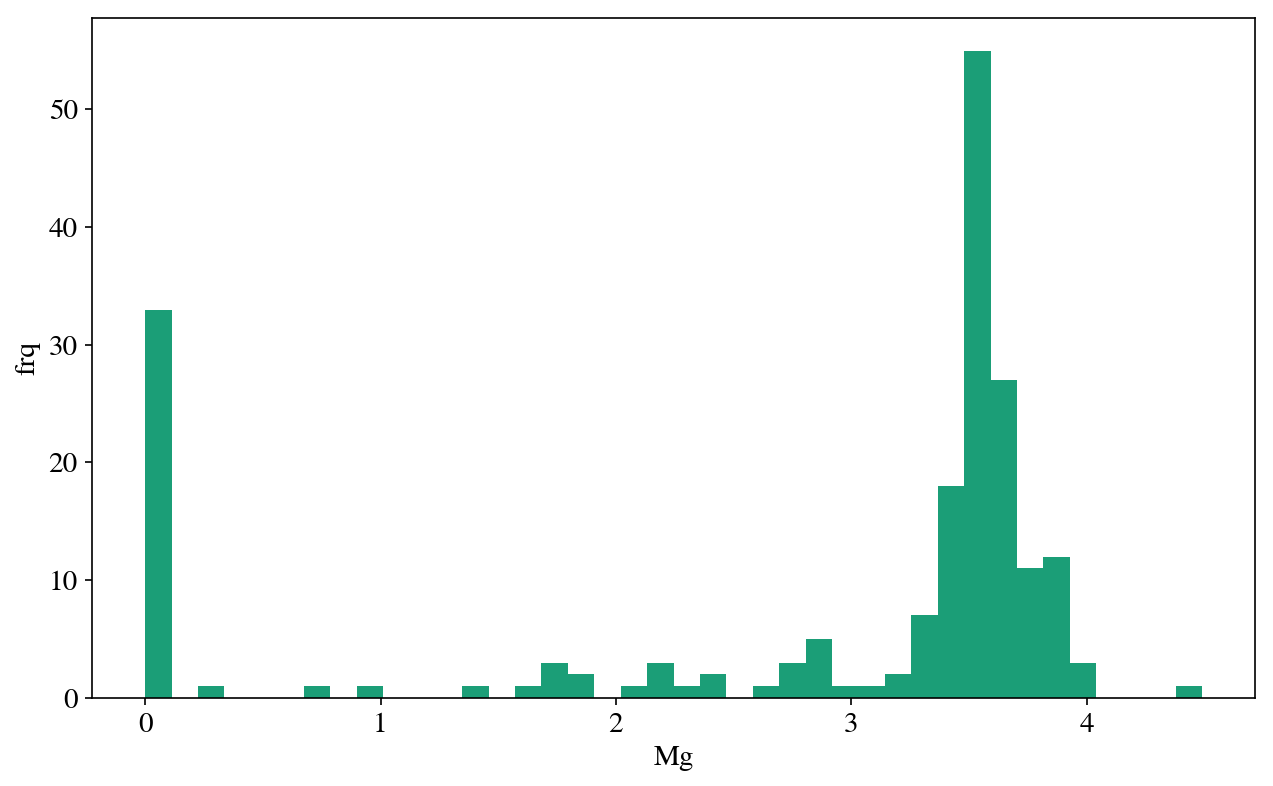

In [26]:
plt.clf()
plt.hist(train['Mg'],bins=40)
plt.xlabel('Mg')
plt.ylabel("frq")
plt.show()

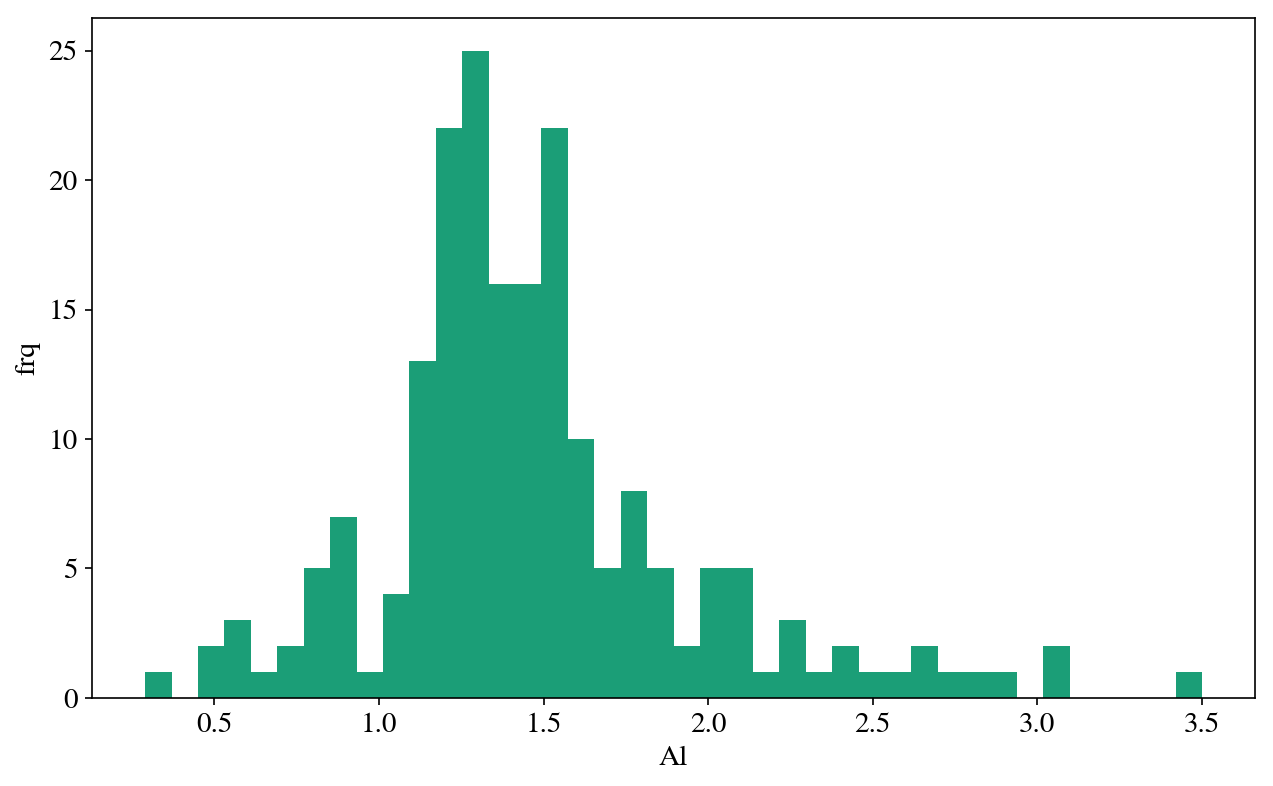

In [27]:
plt.clf()
plt.hist(train['Al'],bins=40)
plt.xlabel('Al')
plt.ylabel("frq")
plt.show()
    

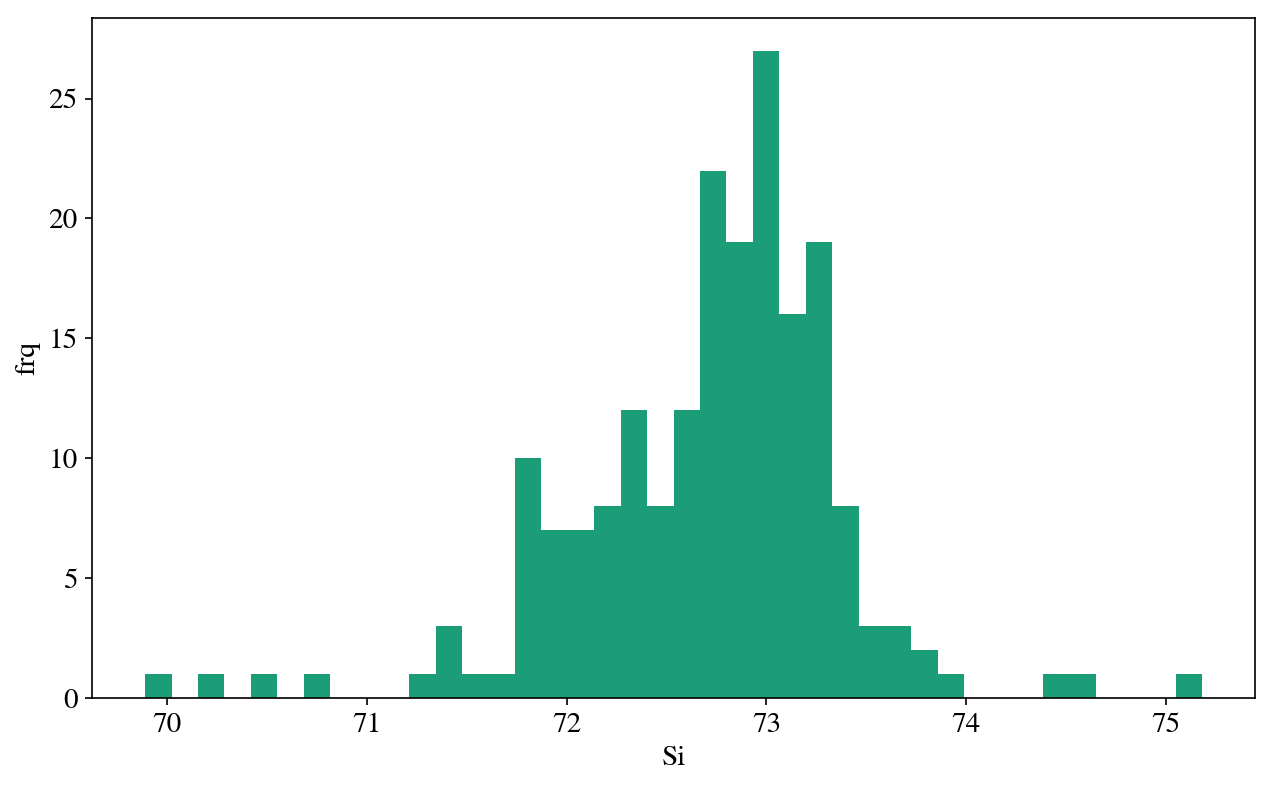

In [28]:
plt.clf()
plt.hist(train['Si'],bins=40)
plt.xlabel('Si')
plt.ylabel("frq")
plt.show()
    

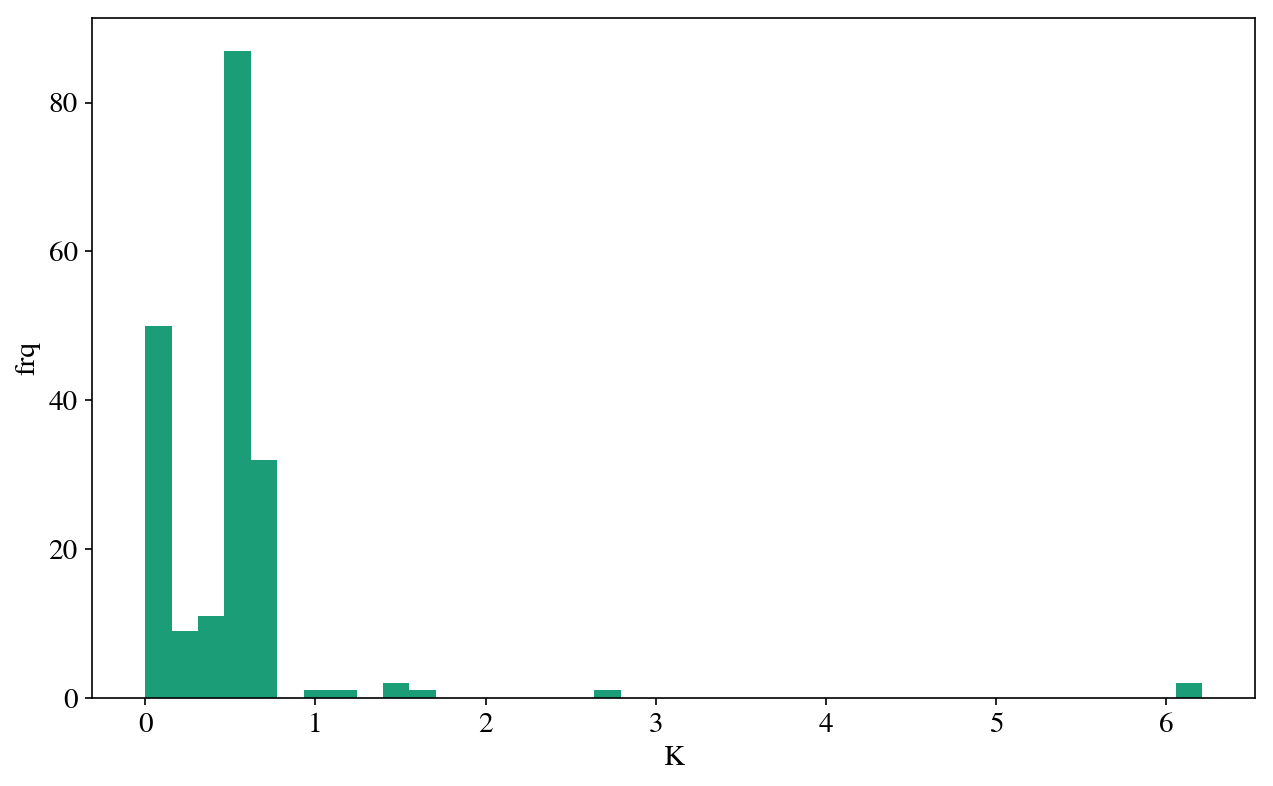

In [29]:
plt.clf()
plt.hist(train['K'],bins=40)
plt.xlabel('K')
plt.ylabel("frq")
plt.show()
    

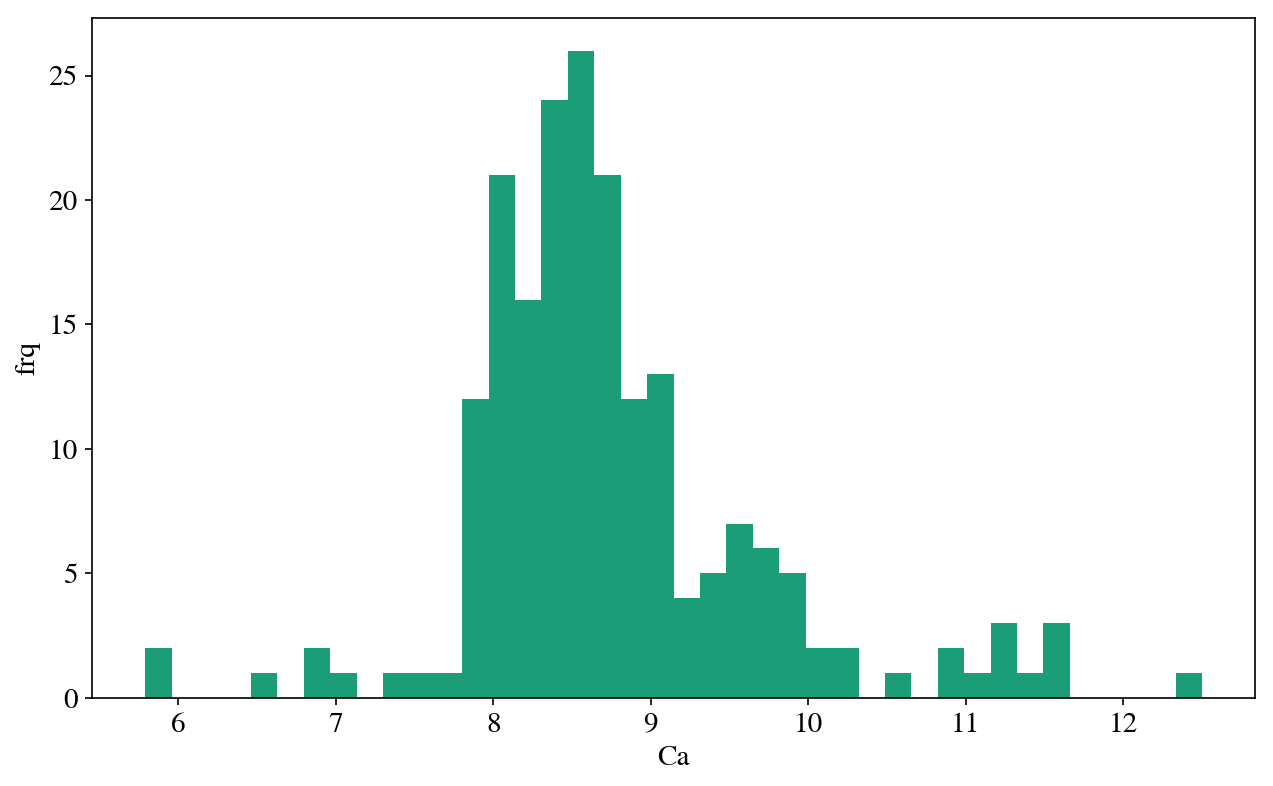

In [30]:
plt.clf()
plt.hist(train['Ca'],bins=40)
plt.xlabel('Ca')
plt.ylabel("frq")
plt.show()

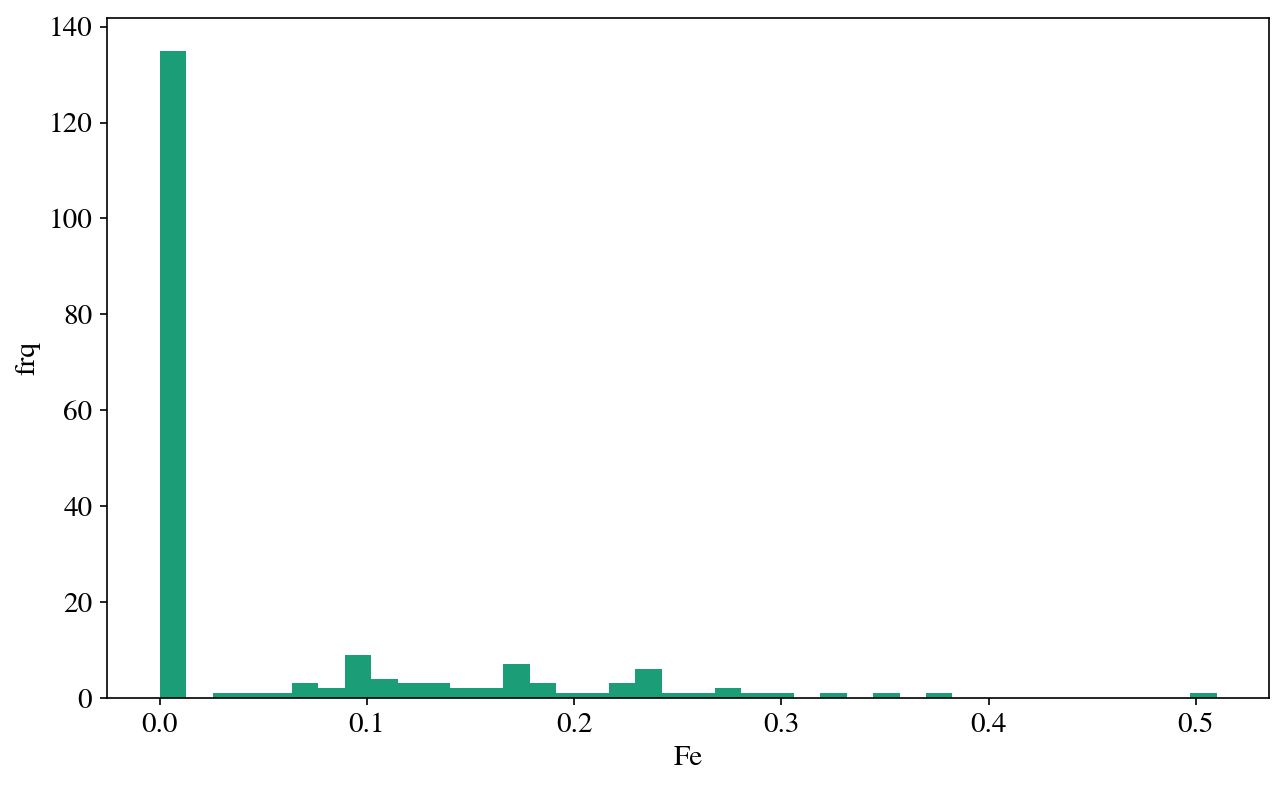

In [31]:
plt.clf()
plt.hist(train['Fe'],bins=40)
plt.xlabel('Fe')
plt.ylabel("frq")
plt.show()

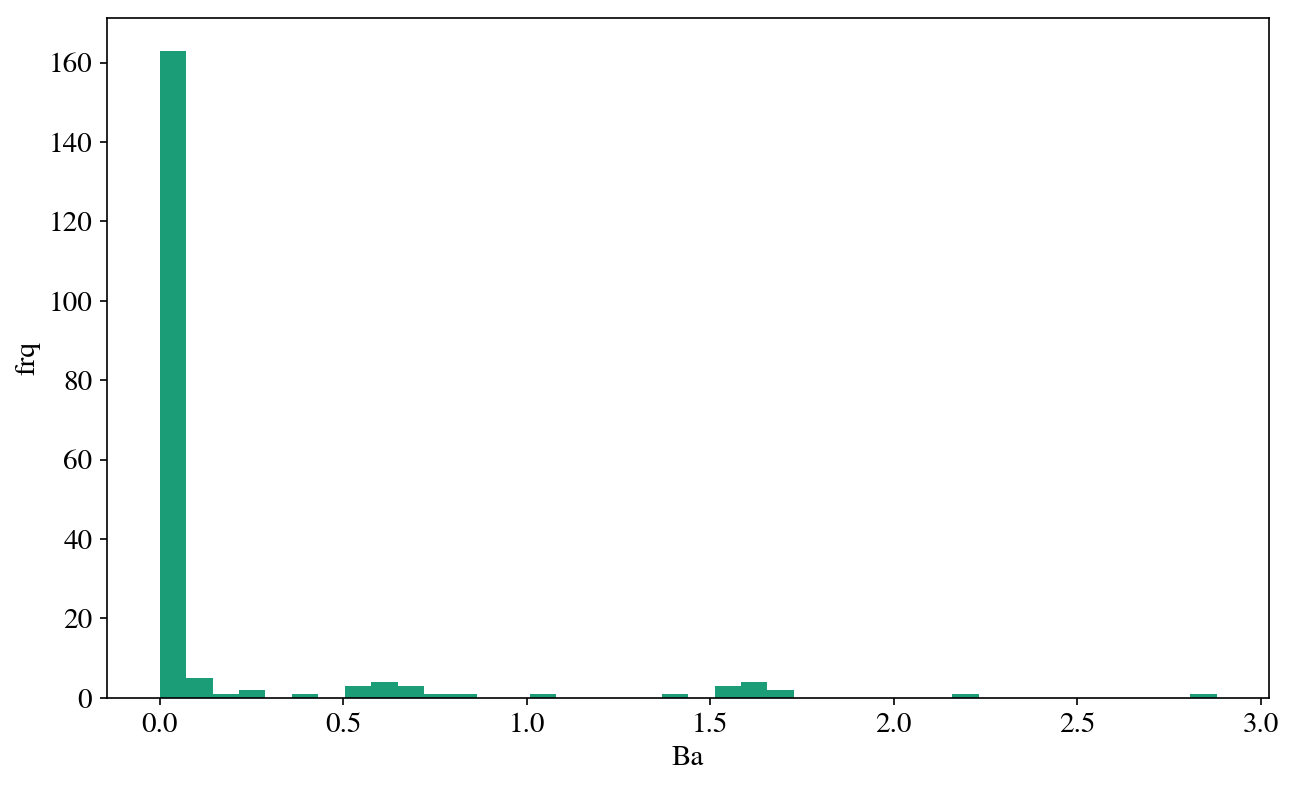

In [32]:
plt.clf()
plt.hist(train['Ba'],bins=40)
plt.xlabel('Ba')
plt.ylabel("frq")
plt.show()

In [33]:
train[feat].skew()
#skewness is reduced but still skewness can be reduced
#by transformation and normalisation can be done to take all of them on same scal

RI    0.610683
Na    0.360411
Mg   -1.328926
Al    1.043716
Si   -0.721044
K     6.615089
Ca    0.946308
Ba    3.336587
Fe    1.849913
dtype: float64

In [34]:
#  A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution.
# Applying BoxCox transformation
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.00000,197.000000,197.000000,197.000000,197.000000
mean,1.517899,13.422030,2.787716,1.473299,72.712284,0.51132,8.752081,0.159594,0.054162,2.751269
std,0.001956,0.700471,1.377272,0.489300,0.670696,0.66570,0.940938,0.451968,0.094399,2.093250
min,1.512990,11.030000,0.000000,0.290000,69.890000,0.00000,5.790000,0.000000,0.000000,1.000000
25%,1.516510,12.930000,2.410000,1.210000,72.370000,0.15000,8.220000,0.000000,0.000000,1.000000
50%,1.517610,13.290000,3.490000,1.400000,72.830000,0.56000,8.570000,0.000000,0.000000,2.000000
75%,1.518720,13.870000,3.610000,1.630000,73.100000,0.61000,9.060000,0.000000,0.090000,3.000000
max,1.523000,15.150000,4.490000,3.500000,75.180000,6.21000,12.500000,2.880000,0.510000,7.000000


In [35]:
pd.crosstab(train["Type"],columns="count")

col_0,count
Type,
1,67
2,67
3,17
5,12
6,8
7,26


In [36]:
# from scipy.stats import boxcox
# features_bc = []

# for feature in feat:
#     bc_transformed, _ = boxcox(train[feature]+1)  # shift by 1 to avoid computing log of negative values
#     features_bc.append(bc_transformed)

# features_boxcox = np.column_stack(features_bc)
# df_bc = pd.DataFrame(data=features_boxcox, columns=feat)
# df_bc['Type'] = train['Type']
# df_bc.describe()

In [37]:
# print(df_bc[feat].skew())
# print("\n")
# print(train[feat].skew())
#boxcox helped a lot in reducing skewness and all the variables are on same scale now so no leverage to any one.

In [38]:
# df_bc.head()

In [39]:
# df_bc['Type'].value_counts()

In [40]:
# df_bc.shape

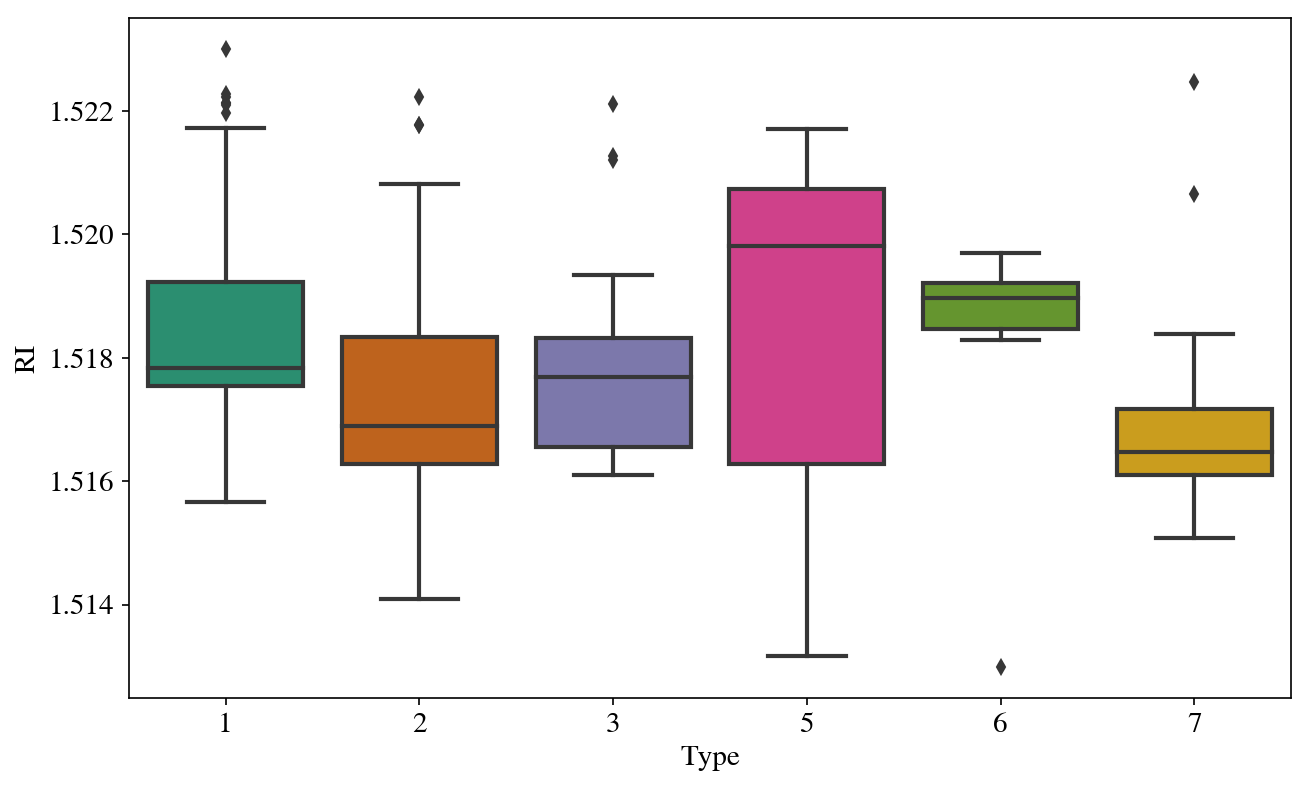

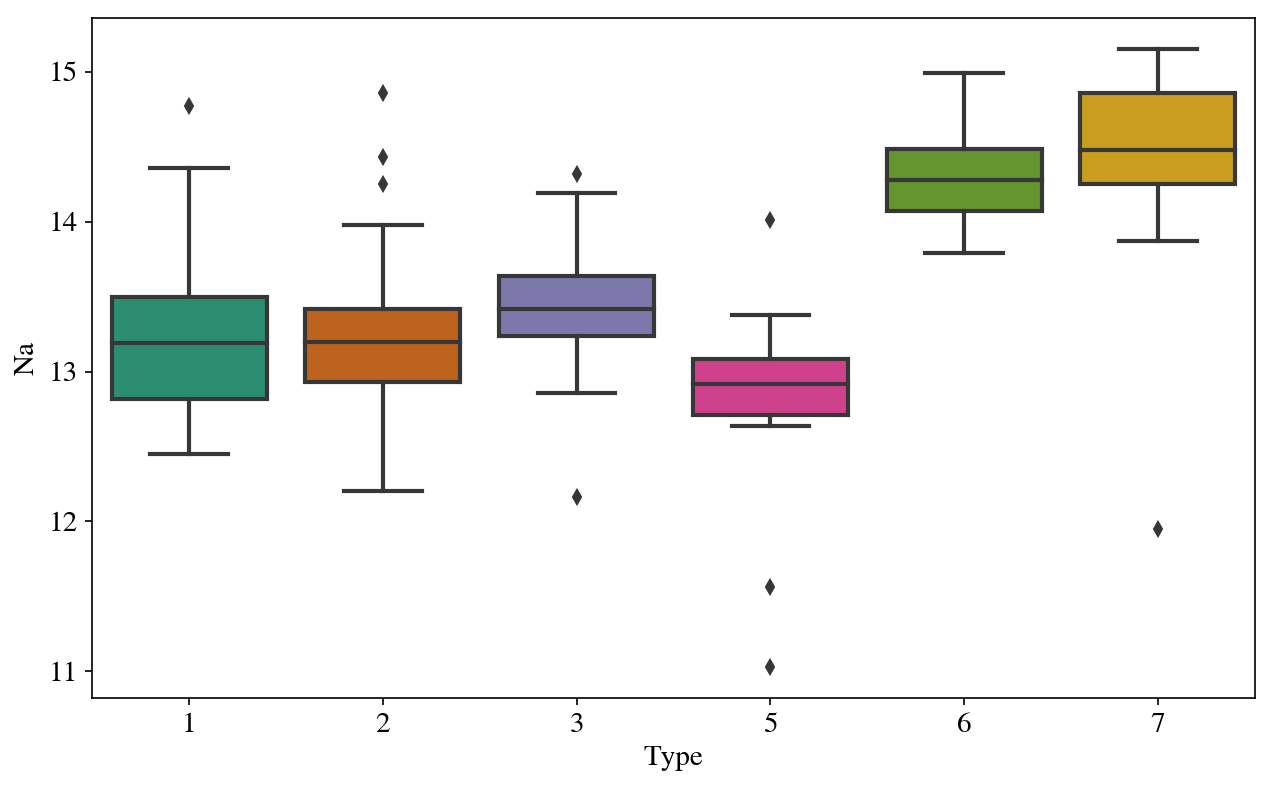

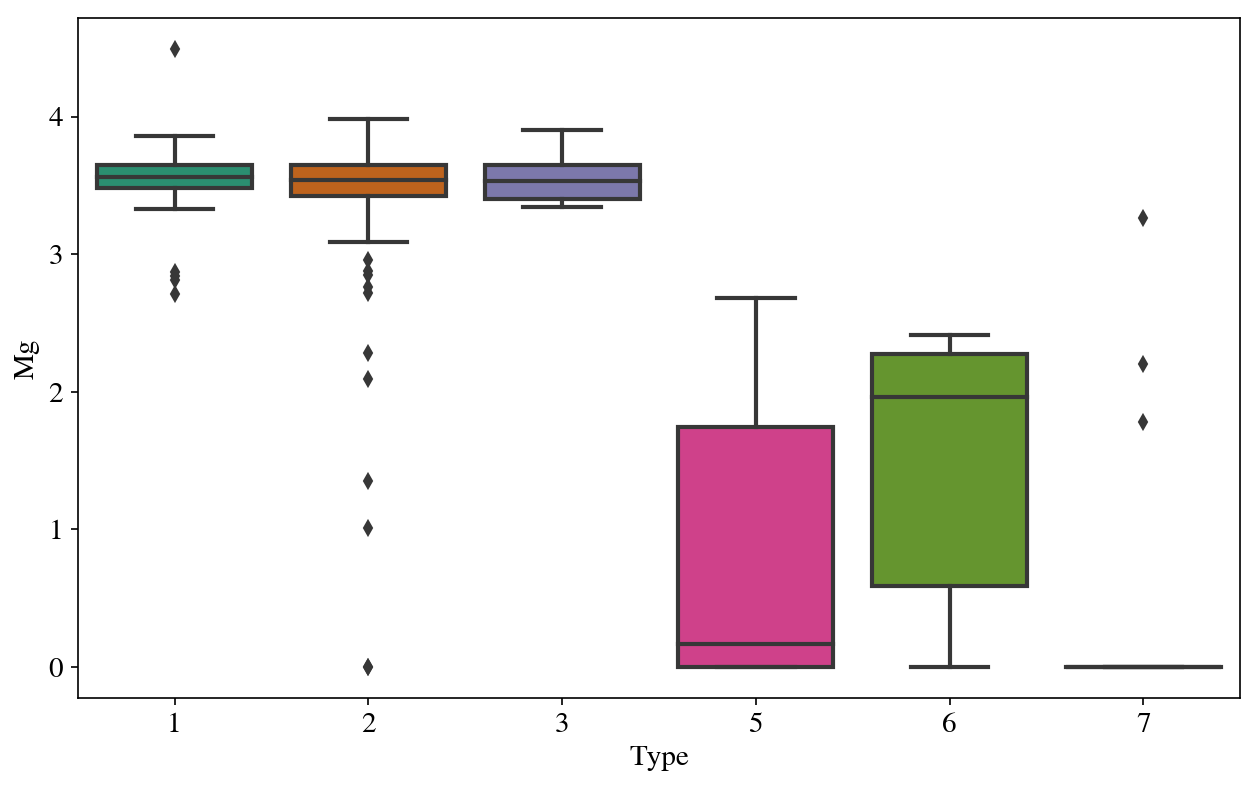

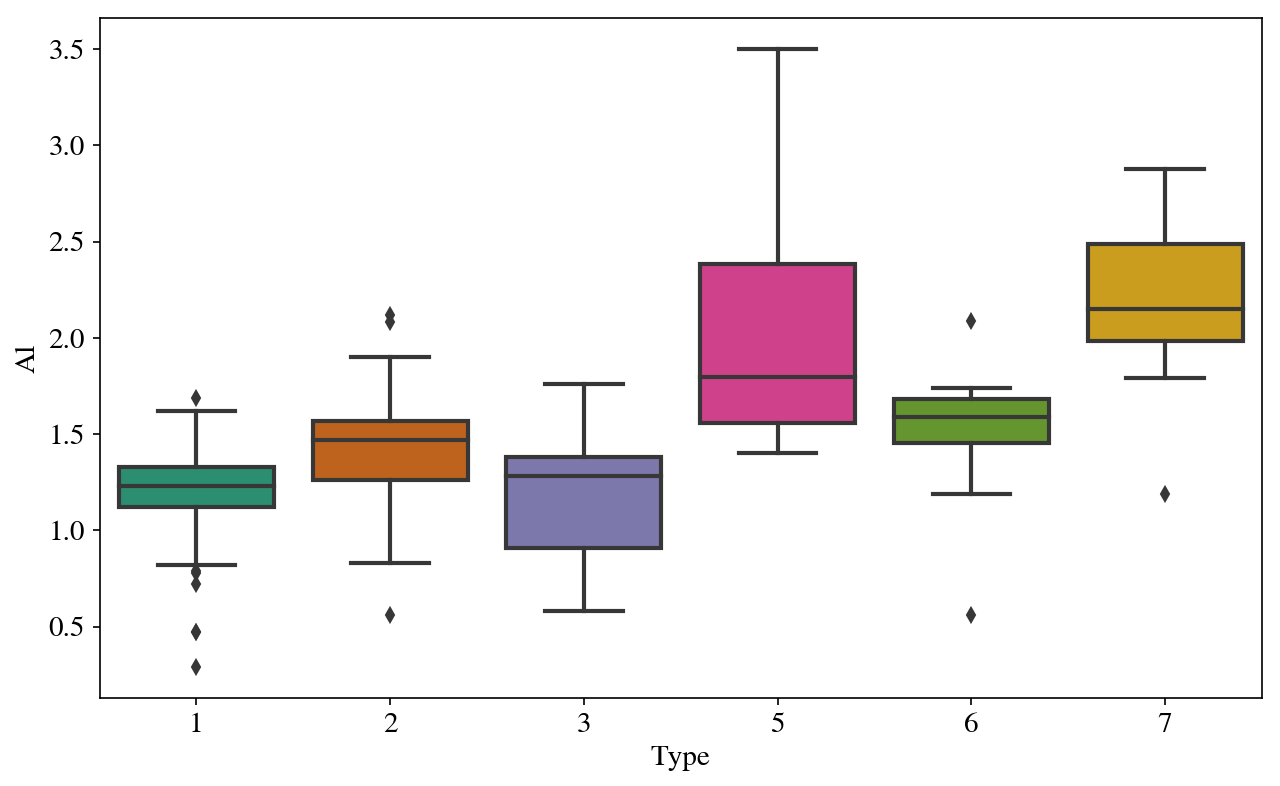

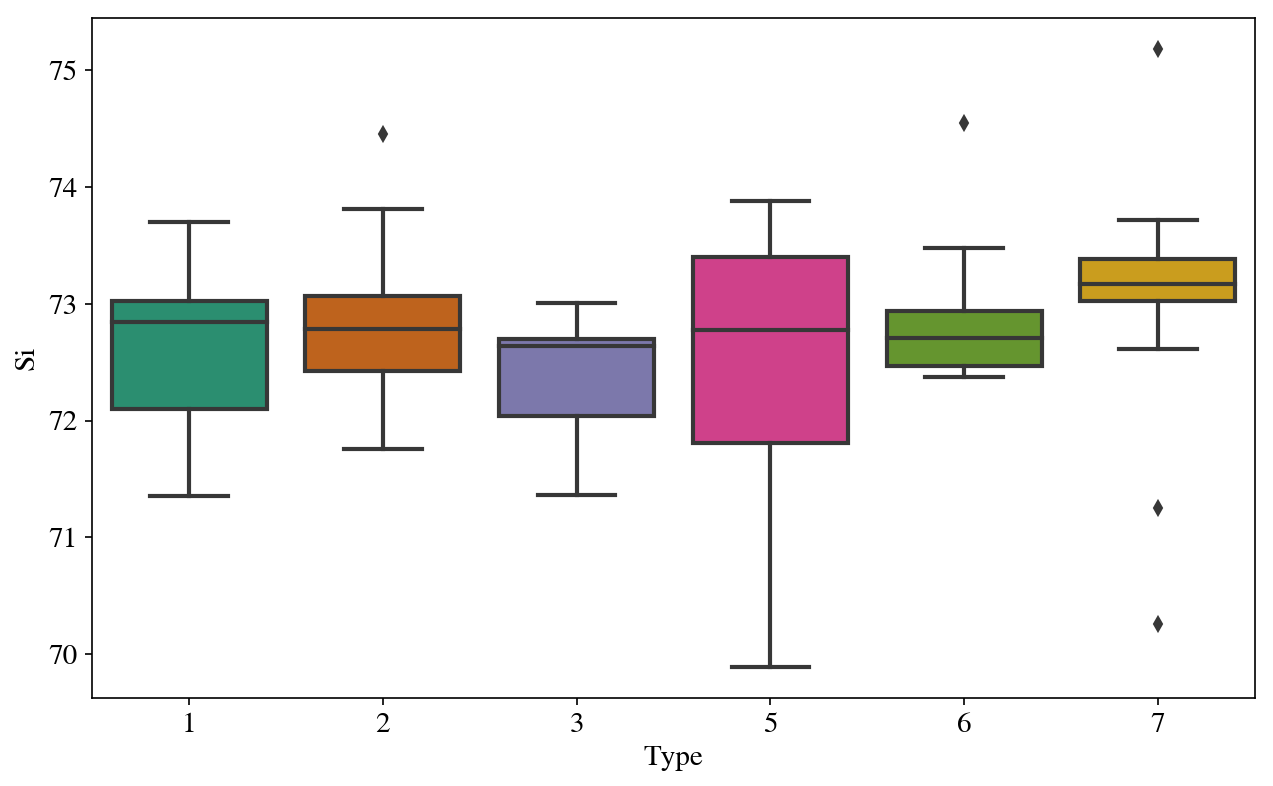

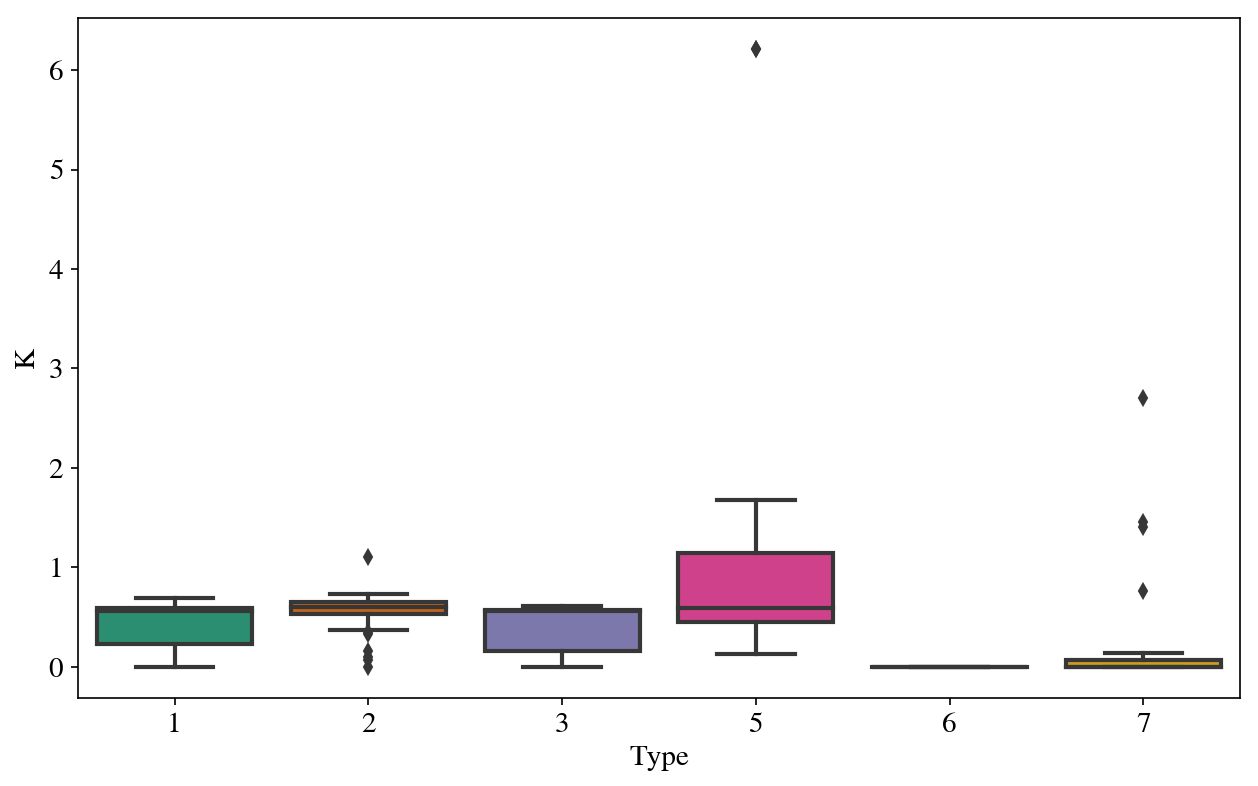

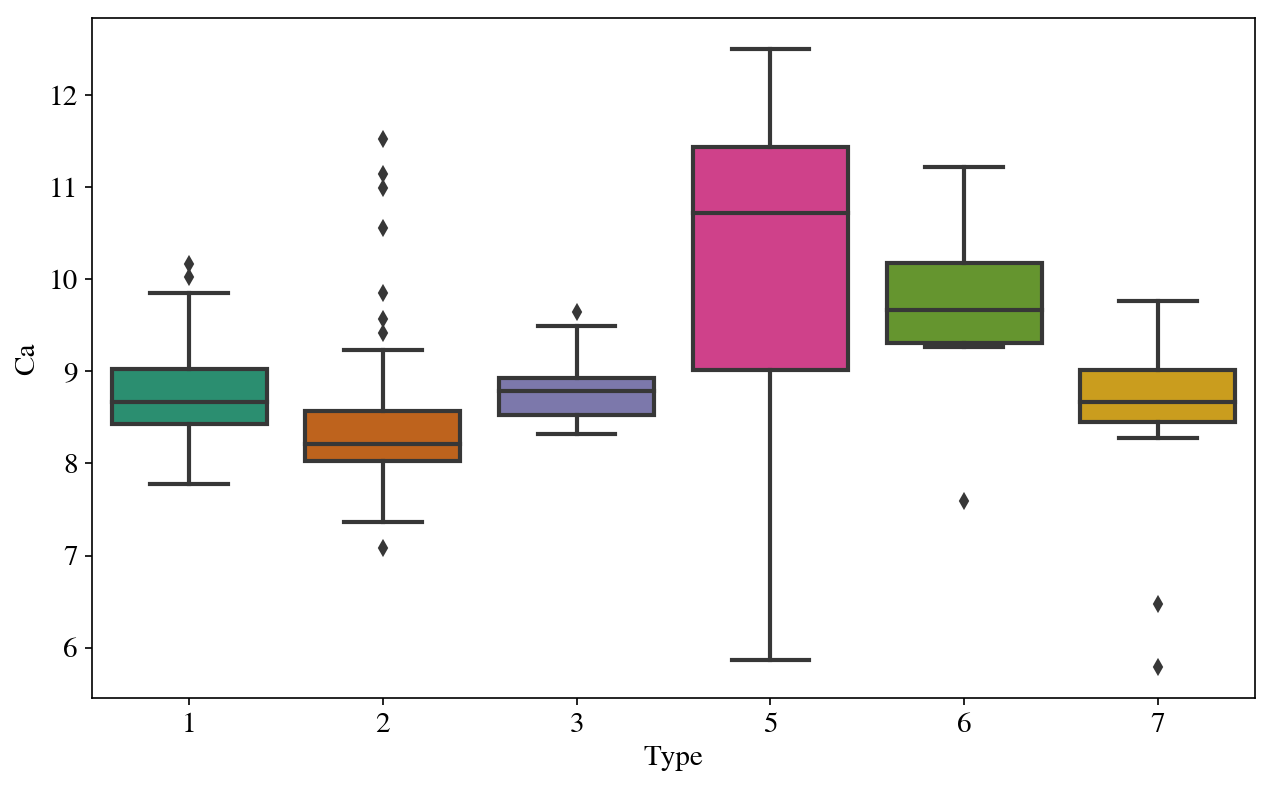

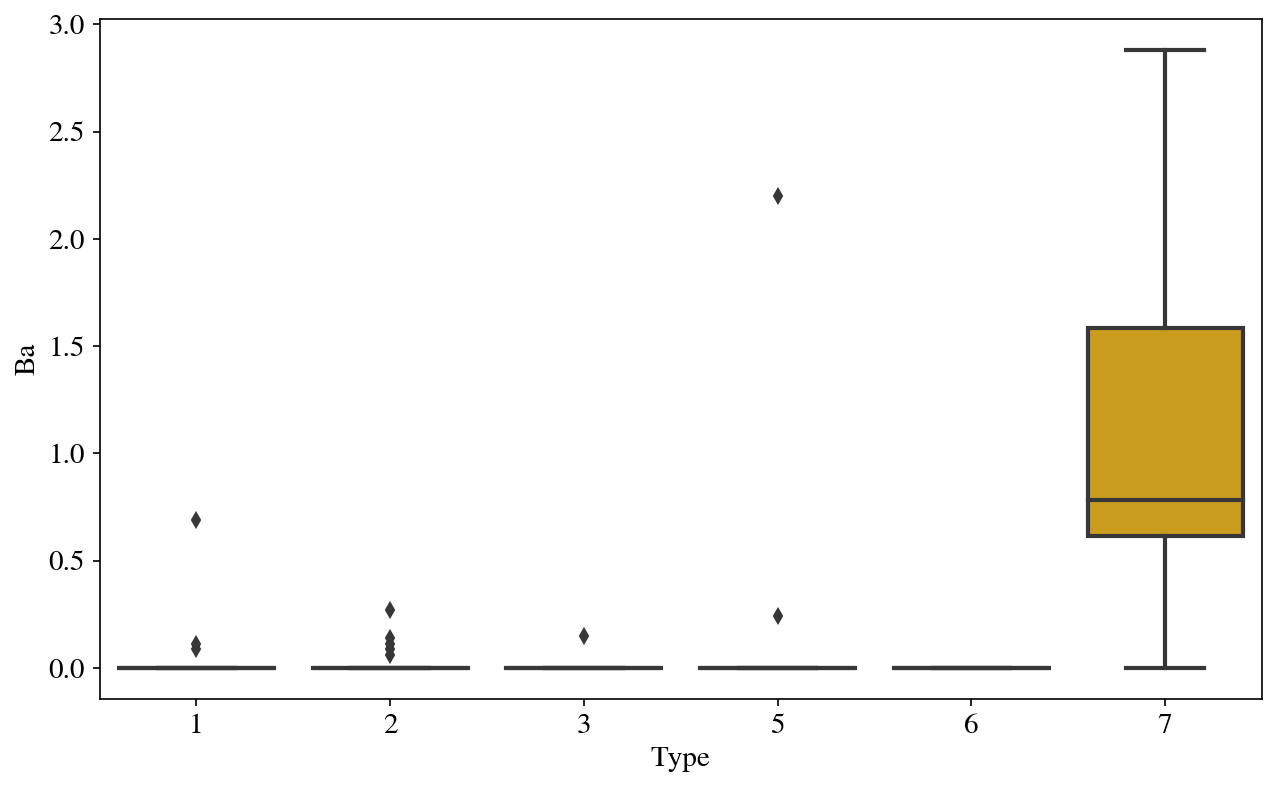

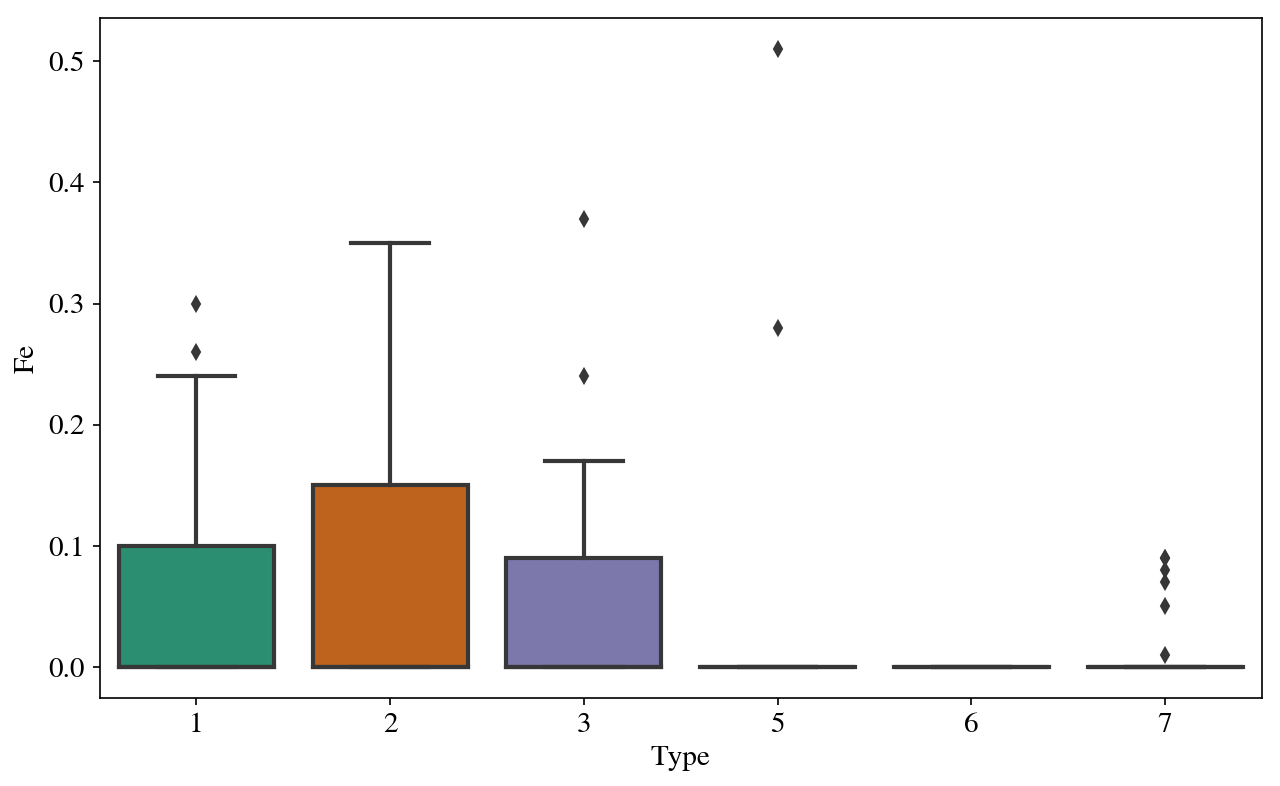

In [41]:
for i in feat:
    sns.boxplot(train['Type'],train[i])
    plt.show()

In [43]:
msk = np.random.rand(len(train)) < 0.8
test = train[~msk]
train = train[msk]

In [44]:
train.shape

(146, 10)

In [45]:
test.shape

(51, 10)

In [46]:
train['Type'].value_counts()

2    54
1    47
7    17
3    14
5     8
6     6
Name: Type, dtype: int64

In [47]:
test['Type'].value_counts()

1    20
2    13
7     9
5     4
3     3
6     2
Name: Type, dtype: int64

In [70]:
from sklearn import svm
from sklearn.model_selection import cross_val_score,GridSearchCV

In [73]:
param_grid={'C':[0.01,0.1,1,5,10], 'gamma' :[0.01, 0.1, 1,6]}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(train[feat],train['Type'])
grid_search.best_params_

{'C': 1, 'gamma': 1}

In [75]:
model=svm.SVC(kernel='rbf',C=1,gamma=1)
model.fit(train[feat],train['Type'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
pred=model.predict(test[feat])

In [79]:
from sklearn.metrics import classification_report
print(classification_report(test['Type'],pred))

             precision    recall  f1-score   support

          1       0.78      0.90      0.84        20
          2       0.58      0.85      0.69        13
          3       0.00      0.00      0.00         3
          5       1.00      0.25      0.40         4
          6       1.00      0.50      0.67         2
          7       1.00      0.78      0.88         9

avg / total       0.75      0.75      0.72        51



In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(test['Type'],pred)

0.74509803921568629